# Analysis of Mall Segmentation dataset

# Imports

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Loading file

In [105]:
filename='Mall_Customers.csv'
data=pd.read_csv(filename)

# Data preprocessing

In [100]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Customer age distribution

Text(0.5, 1.0, 'Customer Age Statistics')

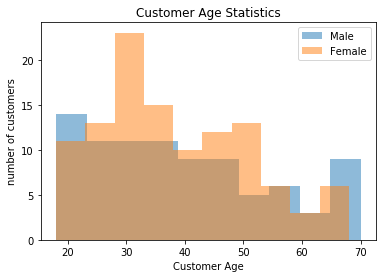

In [117]:
#plt.hist(data['Age'],bins=30)
plt.hist('Age', data=data[data['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=data[data['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.legend()
plt.xlabel('Customer Age')
plt.ylabel('number of customers')
plt.title('Customer Age Statistics')

The men in this data set tended to be younger than the women. You can see the spike around the age of 30–35 for the women is where the majority of them fall. There are also more middle-aged women in this data set than men. There is a significant amount of senior men in the 65–70 year old bucket.

# Correlating the data

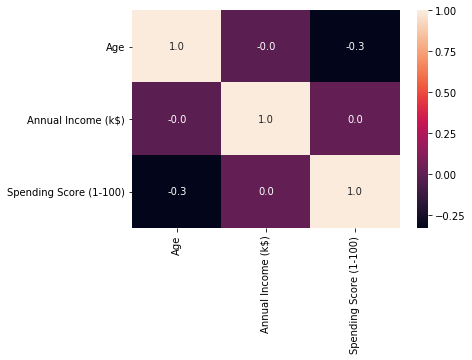

In [106]:
drop_col=['CustomerID']
data=data.drop(drop_col,axis=1)
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

# Gender distribution of customers

Text(0.5, 1.0, 'Gender Statistics of statistics')

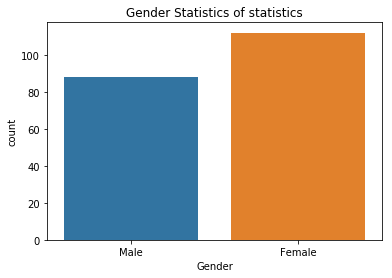

In [103]:
sns.countplot(data.Gender)
plt.title('Gender Statistics of statistics')

There are slightly more women than men in this data set. 

# Relating annual income & spending score

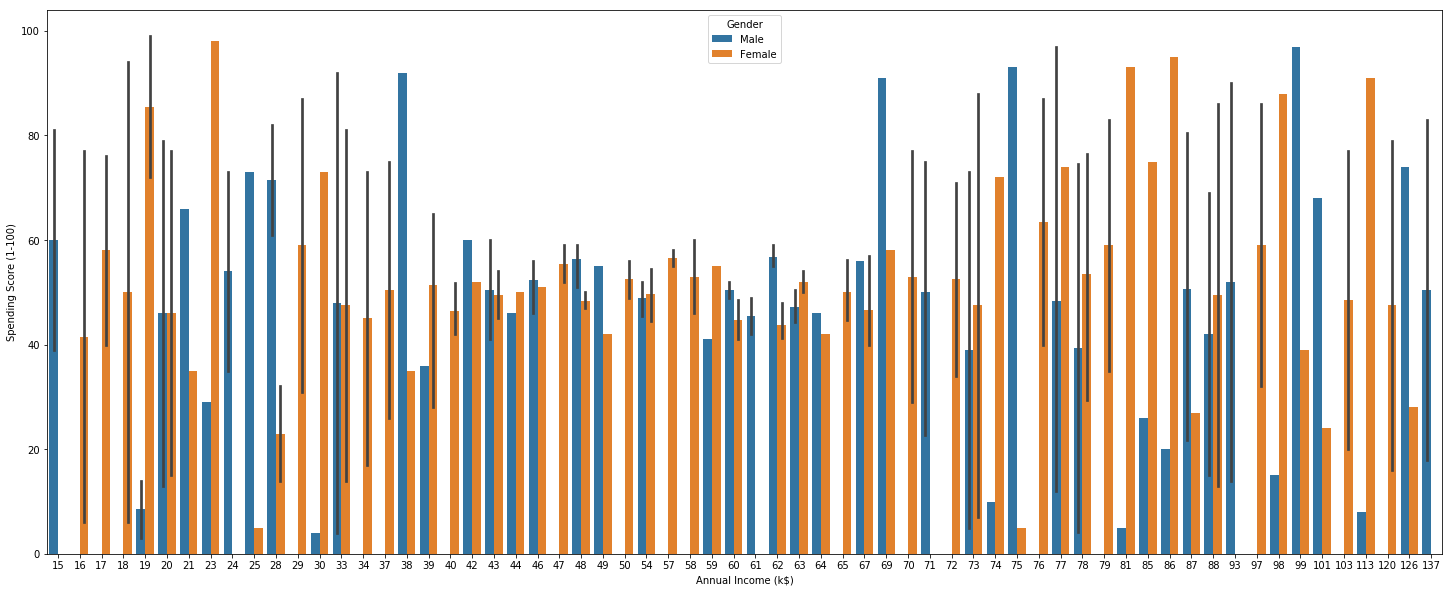

In [9]:
plt.figure(figsize=(25,10))
sns.barplot(x = "Annual Income (k$)", y = "Spending Score (1-100)", hue = "Gender", data = data)

# Correlating age and spending score

Text(0.5, 1.0, 'Age Vs Spending score')

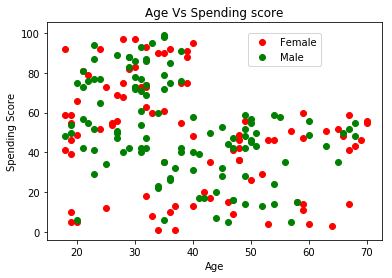

In [10]:
plt.scatter(data_female['Age'],data_female['Spending Score (1-100)'],color='red',label='Female')
plt.scatter(data_male['Age'],data_male['Spending Score (1-100)'],color='green',label='Male')
plt.legend(bbox_to_anchor=(0.6,0.8), loc=3, borderaxespad=0.)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age Vs Spending score')

Spending score of youngsters is more than that of old age customers.

# Correlating spending score & annual income

Text(0.5, 1.0, 'Annual Income Vs Spending score')

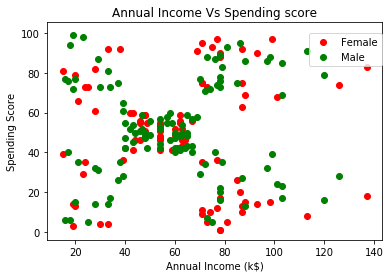

In [115]:
plt.scatter(data_female['Annual Income (k$)'],data_female['Spending Score (1-100)'],color='red',label='Female')
plt.scatter(data_male['Annual Income (k$)'],data_male['Spending Score (1-100)'],color='green',label='Male')
plt.legend(bbox_to_anchor=(1.0,0.8), loc=4, borderaxespad=0.)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Annual Income Vs Spending score')

# Relating age and annual income

Text(0.5, 1.0, 'Age Vs Annual Income')

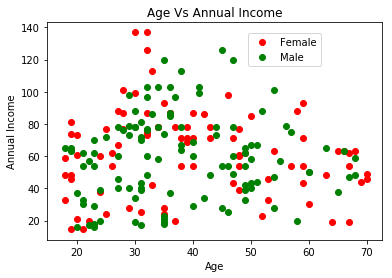

In [12]:
plt.scatter(data_female['Age'],data_female['Annual Income (k$)'],color='red',label='Female')
plt.scatter(data_male['Age'],data_male['Annual Income (k$)'],color='green',label='Male')
plt.legend(bbox_to_anchor=(0.6,0.8), loc=3, borderaxespad=0.)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Age Vs Annual Income')

Customers belonging to middle age earns more than young and old aged customers.

# Genderwise comparison of spending score

Text(0.5, 1.0, 'comparing spending scores')

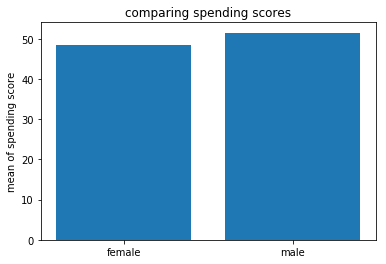

In [25]:
mean_f=data_female['Spending Score (1-100)'].mean()
mean_m=data_male['Spending Score (1-100)'].mean()
height=[mean_f,mean_m]
x=['female','male']
plt.bar(x,height )
plt.ylabel('mean of spending score')
plt.title('comparing spending scores')

Male customers spend more compared to female customers

# Distribution of annual income based on gender

Text(0.5, 1.0, 'AnnualIncome & Gender')

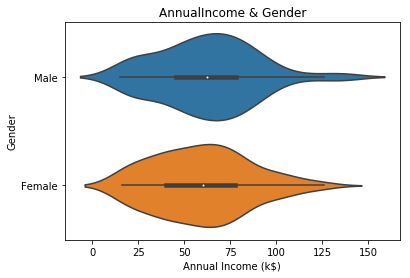

In [118]:
sns.violinplot(x=data['Annual Income (k$)'],y=data['Gender'])
plt.title('AnnualIncome & Gender')

More of female customers earn around 60k annually and male customers earn around 73k annually

# Distribution of spending score based on gender

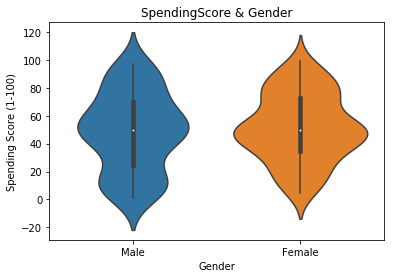

In [27]:
sns.violinplot(y=data['Spending Score (1-100)'],x=data['Gender'])
plt.title('SpendingScore & Gender')
plt.show()

Most of the male customers have spending score around 50 and that of female is around 40.

# Mapping the data

In [73]:
data['Sexmap']=data['Gender'].map({'Female':0,'Male':1}).astype(int)
data['AgesBetween']= pd.cut(data['Age'],5)
age_between=[]
for age in data.Age:
    if((age>=17.948 and age<28.4)):
        age_between.append(0)
    elif((age>=28.4 and age<38.8)):
        age_between.append(1)
    elif((age>=38.8 and age<49.2)):
        age_between.append(2)
    elif((age>=49.2 and age<59.6)):
        age_between.append(3)
    elif((age>=59.6 and age<=70.0)):
        age_between.append(4)
 
age_between=pd.DataFrame(data=age_between,index=range(0,200),columns=['AgeValueBetween'])

data=pd.concat([data,age_between],axis=1)


# Dropping unwanted colouns

In [74]:
drop_col=['Gender','Age','Sexmap','AgesBetween','AgeValueBetween']
train=data.drop(drop_col,axis=1)

# Feature Scaling

In [75]:
sc = StandardScaler()
X = sc.fit_transform(train)

C:\Users\ann\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ann\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Using the elbow method to find the optimal number of clusters

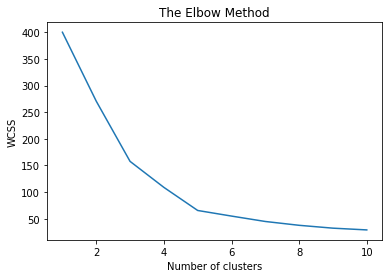

In [76]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The elbow method shows number of clusters to be set for K-Means algorithm is n=5

# Fitting K-Means to the dataset

In [82]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


# Visualising the clusters

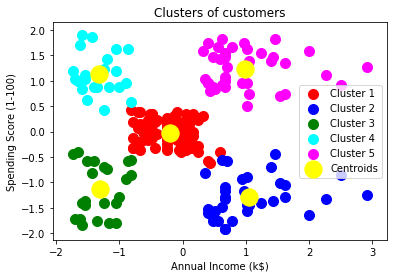

In [83]:

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

Cluster 1 : Customers with medium annual income and spend accordingly. They can be classified as standard customers

Cluster 2 : Customers with high annual income and spend less. They can be classified as careful customers

Cluster 3 :Customers with low annual income and spend less. They can be classified as stable customers

Cluster 4 :Customers with low annual income and spend more. They can be classified as vulnerable customers

Cluster 5 :Customers with high annual income and spend more. They can be classified as safe customers
